# Modeling & Analysis

In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # A key library for statistical modeling

In [8]:
# --- Cell 1: Load the Feature-Engineered Data ---
# Define the path to your features file in the 'processed' folder.
features_file_path = r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_features.csv"

try:
    df = pd.read_csv(features_file_path, index_col='Date', parse_dates=True)
    print("Feature dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at the path: {features_file_path}")
    exit()

Feature dataset loaded successfully!
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2018-05-03  23836.23  23996.15  23531.31  23930.15   23930.15  389240000   
2018-05-04  23865.22  24333.35  23778.87  24262.51   24262.51  329480000   
2018-05-07  24317.66  24479.45  24263.42  24357.32   24357.32  307670000   
2018-05-08  24341.35  24412.34  24198.34  24360.21   24360.21  344940000   
2018-05-09  24399.18  24586.48  24323.87  24542.54   24542.54  361580000   

            Daily_Return  Volume_Change  Volume_Change_Lag1  
Date                                                         
2018-05-03      0.021609       1.009472            1.389218  
2018-05-04      1.388876     -15.352996            1.009472  
2018-05-07      0.390767      -6.619522          -15.352996  
2018-05-08      0.011865      12.113628           -6.619522  
2018-05-09      0.748475       4.824027           12.11362


--- Correlation Matrix ---
                    Daily_Return  Volume_Change  Volume_Change_Lag1
Daily_Return            1.000000      -0.115877           -0.015097
Volume_Change          -0.115877       1.000000           -0.332765
Volume_Change_Lag1     -0.015097      -0.332765            1.000000


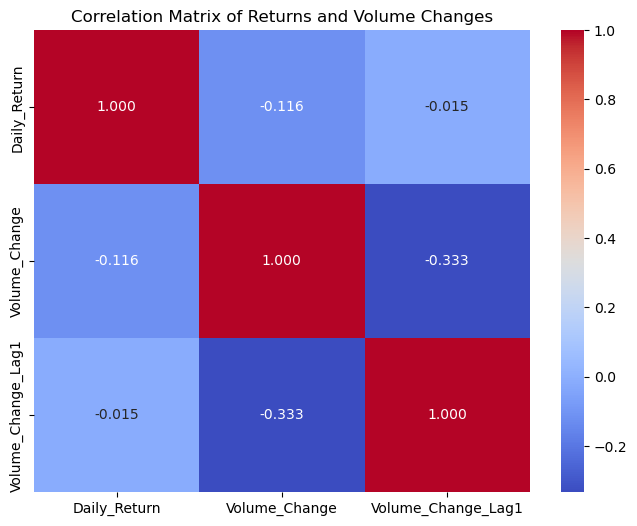

In [12]:
# --- Cell 2: Correlation Analysis ---
# Calculate the correlation between our key variables.
# Correlation coefficients range from -1 (perfect negative correlation) to +1 (perfect positive correlation).
# A value near 0 indicates little to no linear relationship.
print("\n--- Correlation Matrix ---")
correlation_matrix = df[['Daily_Return', 'Volume_Change', 'Volume_Change_Lag1']].corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap for easier interpretation.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix of Returns and Volume Changes')
plt.show()

In [14]:
# --- Cell 3: Linear Regression Analysis ---
# We will test the relationship between volume change and daily returns using linear regression.
# Hypothesis: Daily_Return = β₀ + β₁ * Volume_Change_Lag1
# We use the lagged volume change (yesterday's change) to see if it can predict today's return.

# Define our variables
y = df['Daily_Return']  # Dependent variable (what we want to predict)
X = df['Volume_Change_Lag1'] # Independent variable (what we use for prediction)

# statsmodels requires us to manually add a constant (the intercept β₀) to the model
X = sm.add_constant(X)

# Create and fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X)
results = model.fit()

# Print the detailed summary of the regression results
print("\n--- Linear Regression Summary ---")
print(results.summary())


--- Linear Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2859
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.593
Time:                        18:27:16   Log-Likelihood:                -2158.9
No. Observations:                1256   AIC:                             4322.
Df Residuals:                    1254   BIC:                             4332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
c

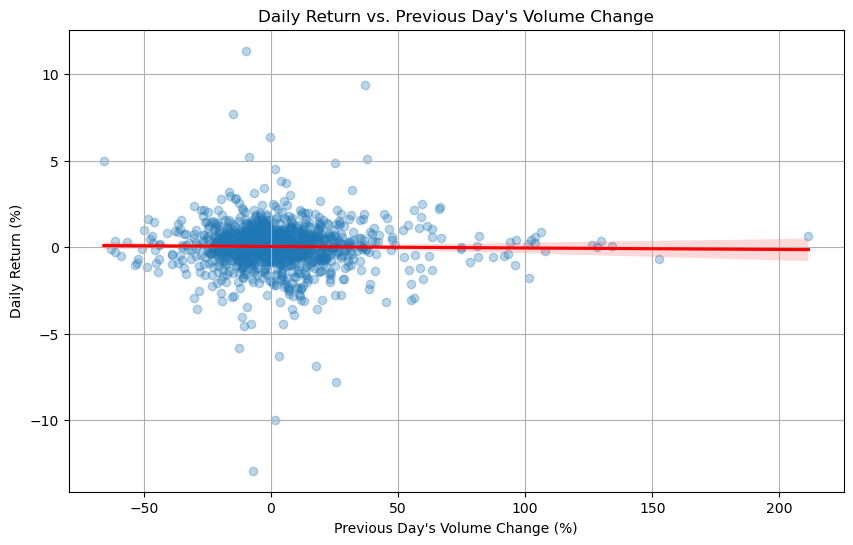

In [16]:
# --- Cell 4: Visualize the Regression Results ---
# A scatter plot helps visualize the relationship between the two variables.
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Volume_Change_Lag1'], y=df['Daily_Return'], line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
plt.title("Daily Return vs. Previous Day's Volume Change")
plt.xlabel("Previous Day's Volume Change (%)")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.show()


All three charts are telling the same story: In the dataset, the change in trading volume is a very poor predictor of short-term stock price movements.